# 뉴스 기사 분류: 다중 분류 문제

In [8]:
import numpy as np
import pandas as pd
from collections import Counter
from keras.datasets import reuters
(train_data,train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

In [11]:
print('train :',train_data.shape)
print('test :',test_data.shape)
print('number of class :', len(np.unique(train_labels)))

train : (8982,)
test : (2246,)
number of class : 46


## Data

In [19]:
def to_one_hot(df,ndim=10000) :
    results = np.zeros((len(df),ndim))
    for i,label in enumerate(df) :
        results[i,label] = 1
    return results

In [22]:
one_hot_train_data = to_one_hot(train_data)
one_hot_test_data = to_one_hot(test_data)

In [23]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [24]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [25]:
one_hot_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Modeling
###### 마지막 Dense 층의 크기가 46, 벡터의 각 차원은 각기 다른 출력 클래스가 인코딩
###### 마지막 층에 softmax 활성화 함수가 사용, 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력. 즉, 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률. 46개의 값을 모두 더하면 1

In [27]:
from keras import models,layers
model = models.Sequential()
model.add(layers.Dense(64,activation ='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation ='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [28]:
x_val = one_hot_train_data[:1000]
x_train = one_hot_train_data[1000:]

y_val = one_hot_train_labels[:1000]
y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 0s 58us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 0s 59us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030
Epoch 

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])

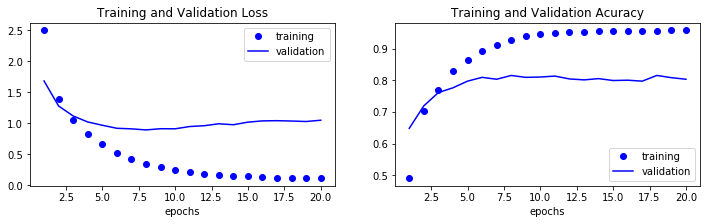

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
epochs = range(1,len(loss)+1)

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.subplot(1,2,1)
plt.plot(epochs,loss,'bo',label='training')
plt.plot(epochs,val_loss,'b',label='validation')
plt.xlabel('epochs') 
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,acc,'bo',label='training')
plt.plot(epochs,val_acc,'b',label='validation')
plt.xlabel('epochs') 
plt.title('Training and Validation Acuracy')
plt.legend()

In [57]:
history = model.fit(x_train,y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s 47us/step - loss: 0.0908 - acc: 0.9563 - val_loss: 1.2435 - val_acc: 0.8050
Epoch 2/9
7982/7982 [==============================] - 0s 46us/step - loss: 0.0889 - acc: 0.9582 - val_loss: 1.2136 - val_acc: 0.7990
Epoch 3/9
7982/7982 [==============================] - 0s 47us/step - loss: 0.0823 - acc: 0.9617 - val_loss: 1.2226 - val_acc: 0.8020
Epoch 4/9
7982/7982 [==============================] - 0s 47us/step - loss: 0.0841 - acc: 0.9583 - val_loss: 1.2954 - val_acc: 0.7920
Epoch 5/9
7982/7982 [==============================] - 0s 47us/step - loss: 0.0834 - acc: 0.9587 - val_loss: 1.2718 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 0s 47us/step - loss: 0.0859 - acc: 0.9582 - val_loss: 1.2761 - val_acc: 0.7970
Epoch 7/9
7982/7982 [==============================] - 0s 47us/step - loss: 0.0839 - acc: 0.9593 - val_loss: 1.2590 - val_acc: 0.7980
Epoch 8/9
7982

In [58]:
model.evaluate(one_hot_test_data,one_hot_test_labels)

2246/2246 [==============================] - 0s 37us/step


[1.4927725921437238, 0.7742653606411398]

# Plus

In [59]:
model = models.Sequential()
model.add(layers.Dense(128,activation ='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation ='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

history = model.fit(x_train,y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
model.evaluate(one_hot_test_data,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 65us/step - loss: 2.3091 - acc: 0.5649 - val_loss: 1.4869 - val_acc: 0.6600
Epoch 2/9
7982/7982 [==============================] - 0s 42us/step - loss: 1.1707 - acc: 0.7444 - val_loss: 1.1619 - val_acc: 0.7450
Epoch 3/9
7982/7982 [==============================] - 0s 42us/step - loss: 0.8312 - acc: 0.8236 - val_loss: 1.0447 - val_acc: 0.7740
Epoch 4/9
7982/7982 [==============================] - 0s 42us/step - loss: 0.6169 - acc: 0.8705 - val_loss: 0.9497 - val_acc: 0.8030
Epoch 5/9
7982/7982 [==============================] - 0s 42us/step - loss: 0.4709 - acc: 0.9013 - val_loss: 0.9173 - val_acc: 0.8090
Epoch 6/9
7982/7982 [==============================] - 0s 42us/step - loss: 0.3571 - acc: 0.9277 - val_loss: 0.9148 - val_acc: 0.8160
Epoch 7/9
7982/7982 [==============================] - 0s 42us/step - loss: 0.2844 - acc: 0.9379 - val_loss: 0.8868 - val_acc: 0.8210
Epoch 8/9
7982

[0.9974409750499369, 0.7956366874974218]

In [60]:
model = models.Sequential()
model.add(layers.Dense(128,activation ='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation ='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

history = model.fit(x_train,y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
model.evaluate(one_hot_test_data,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s 63us/step - loss: 2.1765 - acc: 0.5675 - val_loss: 1.4044 - val_acc: 0.6720
Epoch 2/9
7982/7982 [==============================] - 0s 42us/step - loss: 1.1059 - acc: 0.7587 - val_loss: 1.1021 - val_acc: 0.7680
Epoch 3/9
7982/7982 [==============================] - 0s 41us/step - loss: 0.7822 - acc: 0.8289 - val_loss: 0.9821 - val_acc: 0.7880
Epoch 4/9
7982/7982 [==============================] - 0s 41us/step - loss: 0.5623 - acc: 0.8789 - val_loss: 1.0129 - val_acc: 0.7710
Epoch 5/9
7982/7982 [==============================] - 0s 41us/step - loss: 0.4237 - acc: 0.9084 - val_loss: 0.8892 - val_acc: 0.8080
Epoch 6/9
7982/7982 [==============================] - 0s 42us/step - loss: 0.3155 - acc: 0.9308 - val_loss: 0.9847 - val_acc: 0.7890
Epoch 7/9
7982/7982 [==============================] - 0s 41us/step - loss: 0.2582 - acc: 0.9419 - val_loss: 0.9460 - val_acc: 0.8010
Epoch 8/9
7982

[1.0494916424195042, 0.7858414960459524]